Step 1: Load and Preprocess the Dataset

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))


# Any results you write to the current directory are saved as output.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the 28x28 images into 784-d vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


Step 2: Design the Neural Network Architecture

In [13]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\shivam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 3: Compile and Train the Model

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2, verbose=1)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8364 - loss: 0.5566 - val_accuracy: 0.9537 - val_loss: 0.1592
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9583 - loss: 0.1419 - val_accuracy: 0.9639 - val_loss: 0.1202
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9740 - loss: 0.0901 - val_accuracy: 0.9673 - val_loss: 0.1070
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9807 - loss: 0.0652 - val_accuracy: 0.9713 - val_loss: 0.0975
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9850 - loss: 0.0498 - val_accuracy: 0.9704 - val_loss: 0.1003
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9887 - loss: 0.0375 - val_accuracy: 0.9745 - val_loss: 0.0956
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9895 - loss: 0.0319 - val_accuracy: 0.9715 - val_loss: 0.1112
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accurac

Test accuracy: 0.9779


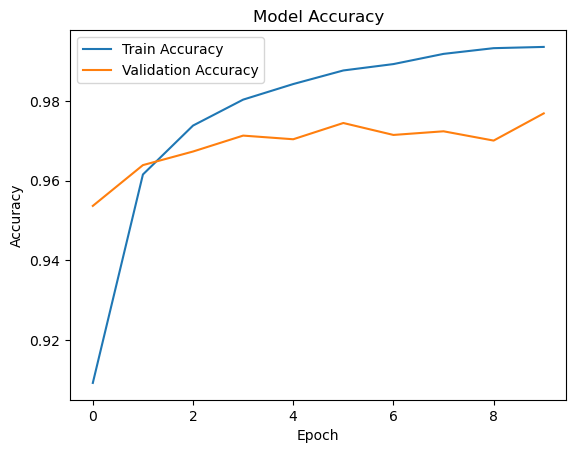

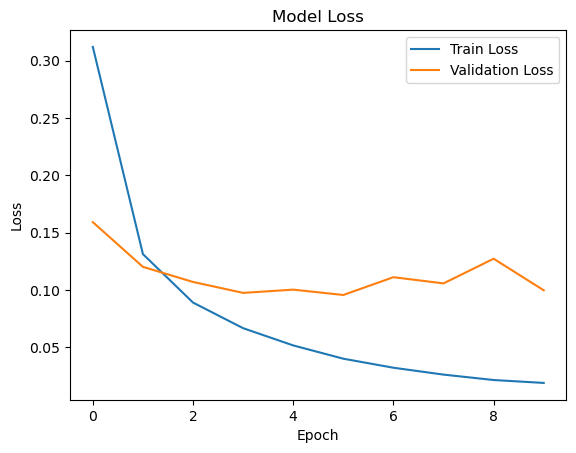

In [19]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
